# CAPP30254 - Machine Learning for Public Policy
## Homework 1
Alec MacMillen
Due: 4/9/2019

The purpose of this document is to perform analysis of Chicago crime data pulled from the city's open data API. The data were scraped and cleaned in chicago_crime.py and acs.py; this Jupyter notebook takes that cleaned data and performs some basic visualizations and analysis. Written conclusions and answers to homework questions are written up here as well.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 55
pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
full_data = pd.read_csv("acs_crime_merged.csv")

In [3]:
full_data['community_area'].fillna(0, inplace=True)
full_data['community_area'] = full_data['community_area'].astype(int).astype(str)

full_data['ward'].fillna(0, inplace=True)
full_data['ward'] = full_data['ward'].astype(int).astype(str)

### Question 1
#### Summary Statistics & Graphs

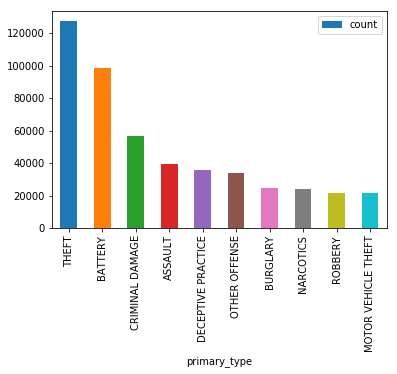

In [4]:
top_crimes_bothyears = full_data.groupby(['primary_type']).size().reset_index().sort_values(0, ascending=False)[:10]
top_crimes_bothyears.rename(columns={0:'count'}, inplace=True)
top_plot = top_crimes_bothyears.plot.bar(x='primary_type', y='count')

The above chart shows the 10 most commonly reported types of crime across the two-year period 1/1/2017-12/31/2018. Theft (more than 120,000 cases) and battery (approximately 100,000 cases) were by far the most common types of crime. Criminal damage (about 60,000 cases) was the next most common type. The next seven most frequently occuring types were Assault, Deceptive Practice, "Other Offense," Burglary, Narcotics, Robbery, and Motor Vehicle Theft, with reported cases over the two-year period falling in the 20,000-40,000 case range.

In [5]:
top_crimes = full_data.groupby(['year', 'primary_type']).size().sort_values(ascending=False)[:20].reset_index()
top_crimes.rename(columns={0:'Count','year':'Year','primary_type':'Type'}, inplace=True)
top_crimes_pivot = top_crimes.pivot(index='Type', columns='Year', values='Count')
top_crimes_pivot.sort_values(2018, ascending=False, inplace=True)
top_crimes_pivot['Change'] = (top_crimes_pivot[2018]-top_crimes_pivot[2017])/top_crimes_pivot[2017]
top_crimes_table = top_crimes_pivot.style.format({'Change': lambda x: "{:.2}%".format(x*100)})
top_crimes_table

Year,2017,2018,Change
Type,,,
THEFT,63586,64025,0.69%
BATTERY,49137,49719,1.2%
CRIMINAL DAMAGE,28955,27700,-4.3%
ASSAULT,19252,20342,5.7%
DECEPTIVE PRACTICE,17768,17862,0.53%
OTHER OFFENSE,16965,16970,0.029%
NARCOTICS,11475,12798,1.2e+01%
BURGLARY,12946,11687,-9.7%
MOTOR VEHICLE THEFT,11367,9964,-1.2e+01%


This table breaks out the top 10 most commonly occurring types of crime for each of the two years 2017 and 2018. Theft and Battery were by far the most commonly reported crime in each year, and each increased in 2018 as compared to 2017, but only by a very slight amount.

Rates of Deceptive Practice, "Other Offense", Narcotics, Motor Vehicle Theft, and Robbery were virtually static year-over-year. Criminal Damage fell by 4.3%, Assault increased by 5.7%, and Burglary saw the largest yearly change, with the number of cases reported falling by 9.7%.

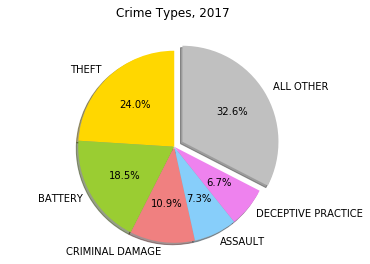

In [6]:
top_crimes_2017 = top_crimes[top_crimes['Year']==2017][:5]
type_other = len(full_data[full_data['year']==2017]) - top_crimes_2017['Count'].sum()
top_crimes_2017 = top_crimes_2017.append({'Year':2017, 'Type':'ALL OTHER', 'Count':type_other}, ignore_index=True)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'violet', 'silver']
explode = (0, 0, 0, 0, 0, 0.1)
plt.pie(top_crimes_2017['Count'], explode=explode, labels=top_crimes_2017['Type'], colors=colors, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.suptitle('Crime Types, 2017')
plt.show()

This pie chart shows the top 5 crime types in 2017 as a proportion of all crimes in that year, with a reference catch-all category that shows all other types of crime for reference.

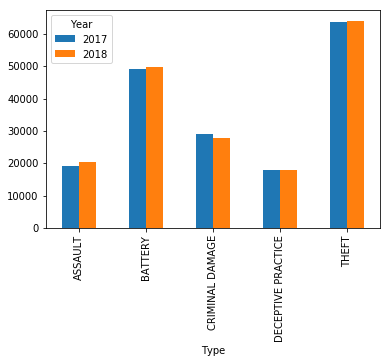

In [7]:
top_crimes_bar = top_crimes[:10]
top_crimes_bar = top_crimes_bar.pivot(index='Type', columns='Year', values='Count')
plot1 = top_crimes_bar.plot.bar()
plot1

The incidence of each of the top 5 most common crime types was virtually unchanged year-over-year from 2017 to 2018. There was a slight uptick in Assault and Battery and a slight drop in Criminal Damage, but the overall picture was fairly static between the two years.

In [8]:
by_ward1 = full_data[['ward', 'primary_type']]
by_ward2 = full_data[['ward', 'location_description']]

In [9]:
ward_a = by_ward1.groupby(['ward']).agg(lambda x: x.value_counts().index[0]).reset_index().sort_values('ward')
ward_a['ward'] = ward_a['ward'].astype(int)
ward_b = by_ward2.groupby(['ward']).agg(lambda x: x.value_counts().index[0]).reset_index().sort_values('ward')
ward_b['ward'] = ward_b['ward'].astype(int)
ward_c = by_ward1.groupby(['ward']).size().reset_index()
ward_c['ward'] = ward_c['ward'].astype(int)

type_location_ward = ward_c.merge(ward_a, on='ward', how='inner')
type_location_ward = type_location_ward.merge(ward_b, on='ward', how='inner')
type_location_ward.sort_values('ward', inplace=True)
type_location_ward.rename(columns={0:'count'}, inplace=True)
type_location_ward.drop(labels=0, axis=0, inplace=True)
pd.options.display.max_rows = 55
print(type_location_ward.to_string(index=False))

ward  count primary_type location_description
   1  10015        THEFT               STREET
   2  21343        THEFT               STREET
   3  13818      BATTERY               STREET
   4  10448        THEFT               STREET
   5  12364      BATTERY            APARTMENT
   6  17228      BATTERY               STREET
   7  13639      BATTERY            RESIDENCE
   8  13956      BATTERY            RESIDENCE
   9  14132      BATTERY            RESIDENCE
  10   8415      BATTERY            RESIDENCE
  11   6482        THEFT               STREET
  12   6216      BATTERY               STREET
  13   6081        THEFT            RESIDENCE
  14   6285        THEFT               STREET
  15  11892      BATTERY            RESIDENCE
  16  13064      BATTERY               STREET
  17  17467      BATTERY            RESIDENCE
  18   8518      BATTERY            RESIDENCE
  19   4402        THEFT            RESIDENCE
  20  15112      BATTERY            APARTMENT
  21  16085        THEFT          

The above table shows the total number of reported crimes, most common crime type, and most common crime setting (e.g., Street) for each of Chicago's 50 wards in the two-year period 2017-2018. The 19th Ward saw the lowest number of crimes reported, with 4,402. The 42nd Ward had the highest number of reported crimes, with 34,943. Theft and Battery were the top type of reported crime in every single ward. The most commonly reported crime setting was Street for most wards, however, some wards had more crimes reported on the Street or in an Apartment or Residence. The one outlier in this regard was the 42nd Ward, which had the plurality of its crimes reported in a Restaurant - this is an unusual finding and warrants further investigation to determine whether this is a genuine phenomenon or some quirk or error in the data.

In [10]:
top_wards = type_location_ward.sort_values('count', ascending=False)[:10]
top_wards = top_wards[['ward', 'count']]
print(top_wards.to_string(index=False))

ward  count
  42  34943
  24  24914
  28  22916
   2  21343
  27  20959
  17  17467
   6  17228
  21  16085
  20  15112
   9  14132


This table shows the 10 wards with the highest number of crimes reported in 2017-2018. Ward 42 has by far the highest number of crimes in the 2-year period, with 10,000 more than the next-highest ward, Ward 24.

### Question 2
#### Parts 1-3

In [11]:
full_2017 = full_data[full_data['year']==2017]
full_2018 = full_data[full_data['year']==2018]
types_2017 = full_2017[['zipcode', 'primary_type']].groupby(['zipcode']).agg(lambda x: x.value_counts().index[0]).reset_index()
types_2018 = full_2018[['zipcode', 'primary_type']].groupby(['zipcode']).agg(lambda x: x.value_counts().index[0]).reset_index()

# Zip codes where battery was the most commonly reported crime
battery_2017 = types_2017[types_2017['primary_type']=='BATTERY']
battery_2018 = types_2018[types_2018['primary_type']=='BATTERY']

In [12]:
# It's unlikely that any zip codes will have HOMICIDE as the most commonly reported crime, so instead, look for the 10 zipcodes
# with the highest number of reported murders
homicide_2017 = full_2017[full_2017['primary_type']=='HOMICIDE']
homicide_2017_counts = homicide_2017.groupby(['zipcode']).size().reset_index().sort_values(0, ascending=False)[:10]

homicide_2018 = full_2018[full_2018['primary_type']=='HOMICIDE']
homicide_2018_counts = homicide_2018.groupby(['zipcode']).size().reset_index().sort_values(0, ascending=False)[:10]

In [13]:
acs = pd.read_csv("acs_full.csv")

In [14]:
acs.rename(columns={'zip code tabulation area':'zipcode'}, inplace=True)
acs.drop('pct_hs', axis=1, inplace=True)

In [15]:
acs.columns

Index(['med_hhinc', 'pct_blk', 'med_unitval', 'zipcode'], dtype='object')

In [16]:
homicide_chars_2017 = acs[acs['zipcode'].isin(homicide_2017_counts['zipcode'])]
battery_chars_2017 = acs[acs['zipcode'].isin(battery_2017['zipcode'])]

In [17]:
homicide_chars_2018 = acs[acs['zipcode'].isin(homicide_2018_counts['zipcode'])]
battery_chars_2018 = acs[acs['zipcode'].isin(battery_2018['zipcode'])]

In [18]:
print("Summary characteristics of zip codes with 'HOMICIDE' in 2017:")
print("Average zip median HH income: ", "${:,.2f}".format(homicide_chars_2017['med_hhinc'].mean()))
print("Average zip pct black: ", "{0:.2%}".format(homicide_chars_2017['pct_blk'].mean()/100))
print("Average zip median unit value: ", "${:,.2f}".format(homicide_chars_2017['med_unitval'].mean()))

Summary characteristics of zip codes with 'HOMICIDE' in 2017:
Average zip median HH income:  $30,166.20
Average zip pct black:  84.54%
Average zip median unit value:  $144,250.00


In [19]:
print("Summary characteristics of zip codes with 'BATTERY' in 2017:")
print("Average zip median HH income: ", "${:,.2f}".format(battery_chars_2017['med_hhinc'].mean()))
print("Average zip pct black: ", "{0:.2%}".format(battery_chars_2017['pct_blk'].mean()/100))
print("Average zip median unit value: ", "${:,.2f}".format(battery_chars_2017['med_unitval'].mean()))

Summary characteristics of zip codes with 'BATTERY' in 2017:
Average zip median HH income:  $42,254.38
Average zip pct black:  48.10%
Average zip median unit value:  $173,479.17


In [20]:
print("Summary characteristics of zip codes with 'HOMICIDE' in 2018:")
print("Average zip median HH income: ", "${:,.2f}".format(homicide_chars_2018['med_hhinc'].mean()))
print("Average zip pct black: ", "{0:.2%}".format(homicide_chars_2018['pct_blk'].mean()/100))
print("Average zip median unit value: ", "${:,.2f}".format(homicide_chars_2018['med_unitval'].mean()))

Summary characteristics of zip codes with 'HOMICIDE' in 2018:
Average zip median HH income:  $29,380.20
Average zip pct black:  89.50%
Average zip median unit value:  $132,060.00


In [21]:
print("Summary characteristics of zip codes with 'BATTERY' in 2018:")
print("Average zip median HH income: ", "${:,.2f}".format(battery_chars_2018['med_hhinc'].mean()))
print("Average zip pct black: ", "{0:.2%}".format(battery_chars_2018['pct_blk'].mean()/100))
print("Average zip median unit value: ", "${:,.2f}".format(battery_chars_2018['med_unitval'].mean()))

Summary characteristics of zip codes with 'BATTERY' in 2018:
Average zip median HH income:  $42,511.44
Average zip pct black:  47.48%
Average zip median unit value:  $169,864.00


For comparison's sake, analysis of zip codes that had 'BATTERY' used the zip codes that had 'BATTERY' as their most commonly reported crime. Because no zip code had 'HOMICIDE' as its most commonly reported crime (thankfully), the zip-by-zip demographic analysis used the 10 zip codes with the highest raw number of homicides in each year 2017 and 2018.

Based on the 5-year ACS data, zip codes that have HOMICIDE tend to have lower household income, lower median unit (property) values, and have a higher proportion of black residents. This pattern held true over both years 2017 and 2018. For example, in 2017, zip codes with HOMICIDE had an average median household income of \\$30,166.20, while for zip codes with BATTERY it was \\$42,254.38. The corresponding figures in 2018 were \\$29,380.20 and \\$42,444.83, respectively. The same pattern holds true with median unit (property) value.

In 2017, zip codes with HOMICIDE were 84.54% black (89.50% in 2018), while zip codes with BATTERY were 48.10% black (49.30% in 2018). Apparently this trend 

#### Part 4
Zip codes that get "Deceptive Practice" vs. "Sex Offense."

In [22]:
deceptive_practice = full_data[full_data['primary_type']=='DECEPTIVE PRACTICE']
deceptive_practice_counts = deceptive_practice.groupby(['zipcode']).size().reset_index().sort_values(0, ascending=False)[:20]

sex_offense = full_data[full_data['primary_type']=='SEX OFFENSE']
sex_offense_counts = sex_offense.groupby(['zipcode']).size().reset_index().sort_values(0, ascending=False)[:20]

dp_zips = acs[acs['zipcode'].isin(deceptive_practice_counts['zipcode'])]
dp_zips.drop(labels=32268, axis=0, inplace=True)
so_zips = acs[acs['zipcode'].isin(sex_offense_counts['zipcode'])]
so_zips.drop(labels=32268, axis=0, inplace=True)

In [23]:
print("Summary characteristics of zip codes with 'DECEPTIVE PRACTICE':")
print("Average zip median HH income: ", "${:,.2f}".format(dp_zips['med_hhinc'].mean()))
print("Average zip pct black: ", "{0:.2%}".format(dp_zips['pct_blk'].mean()/100))
print("Average zip median unit value: ", "${:,.2f}".format(dp_zips['med_unitval'].mean()))

Summary characteristics of zip codes with 'DECEPTIVE PRACTICE':
Average zip median HH income:  $59,802.37
Average zip pct black:  45.28%
Average zip median unit value:  $283,652.63


In [24]:
print("Summary characteristics of zip codes with 'SEX_OFFENSE':")
print("Average zip median HH income: ", "${:,.2f}".format(so_zips['med_hhinc'].mean()))
print("Average zip pct black: ", "{0:.2%}".format(so_zips['pct_blk'].mean()/100))
print("Average zip median unit value: ", "${:,.2f}".format(so_zips['med_unitval'].mean()))

Summary characteristics of zip codes with 'SEX_OFFENSE':
Average zip median HH income:  $42,280.95
Average zip pct black:  48.62%
Average zip median unit value:  $210,663.16


Zip codes that have "DECEPTIVE PRACTICE" are more similar to zip codes with "SEX OFFENSE" than zip codes with "HOMICIDE" and "BATTERY." For the aggregated two-year 2017-2018 period, the two types of zip codes had roughly an equal proportion of black residents (45.28% for Deceptive Practice zips and 48.62% for Sex Offense zips). On the other hand, median HH incomes and median unit values were a bit lower in Sex Offense zips: median HH incomes were \\$42,280.95 vs. \\$59,802.37 for Deceptive Practice zips, and median unit values were \\$210,663.16 vs. \\$283,652.63 for Deceptive Practice zips.

### Question 3
#### Part 1
There do not appear to be any major shifts in crime on a citywide basis in Chicago from 2017 to 2018. As shown in the table below, there were no wards for which the number of crimes reported in 2018 was more than 10% different (in either direction) than the number reported in 2017. As referenced in the 2017-2018 bar plot of top 5 crime types above (in question 1), there did not appear to be any major shifts in the *types* of crimes reported, either. At a macro level, there were 264,981 crimes reported in 2017 and 263,543 reported in 2018.

In [25]:
ward_crimes = full_data.groupby(['year', 'ward']).size().sort_values().reset_index()
ward_crimes.rename(columns={0:'Count','year':'Year','ward':'Ward'}, inplace=True)
ward_crimes_pivot = ward_crimes.pivot(index='Ward', columns='Year', values='Count')
ward_crimes_pivot.sort_values(2018, ascending=False, inplace=True)
ward_crimes_pivot['Change'] = (ward_crimes_pivot[2018]-ward_crimes_pivot[2017])/ward_crimes_pivot[2017]
ward_crimes_table = ward_crimes_pivot.style.format({'Change': lambda x: "{:.2}%".format(x*100)})
ward_crimes_table

Year,2017,2018,Change
Ward,,,
42,17149,17794,3.8%
24,12461,12453,-0.064%
28,11188,11728,4.8%
27,9927,11032,1.1e+01%
2,11349,9994,-1.2e+01%
17,8665,8802,1.6%
6,8494,8734,2.8%
21,7965,8120,1.9%
20,7660,7452,-2.7%


#### Part 2
To analyze the aldermanic candidate's claims, start by creating two subsetted datasets with month-to-date crime statistics for 7/26/17 and 7/26/18.

In [26]:
full_data['datetime'] = pd.to_datetime(full_data['date'])

In [27]:
def subset_date(df, start_date, end_date):
    '''
    Subset the full crime dataset with start and end dates.
    '''
    mask = (df['datetime'] > start_date) & (df['datetime'] < end_date)
    rv = df[mask]
    return rv

In [28]:
jul_2017 = subset_date(full_data, '07-01-2017', '07-26-2017')
jul_2018 = subset_date(full_data, '07-01-2018', '07-26-2018')

In [29]:
# How much did total crime rise in the 26-day period year-over-year?
print("Total crime reported rose by ", "{0:.2%}".format((len(jul_2018)-len(jul_2017))/len(jul_2017)), " in the same 26-day period in July 2017 and 2018.")

Total crime reported rose by  1.25%  in the same 26-day period in July 2017 and 2018.


The candidate's claim that overal crime rose 16% in the same 26-day period (July 1-26) from 2017 to 2018 seems to be inflated. In fact, it appears that crime only rose 1.25% between those corresponding time periods.

In [30]:
def yearly_change(last_year, this_year, primary_type):
    '''
    last_year, this_year: pandas df's for the corresponding time period this year and the previous year
    primary_type: type of crime (str)
    returns: % change in year-over-year reporting
    '''
    number_last_year = len(last_year[last_year["primary_type"]==primary_type])
    number_this_year = len(this_year[this_year["primary_type"]==primary_type])
    return (number_this_year-number_last_year)/number_last_year 

In [31]:
robberies = yearly_change(jul_2017, jul_2018, "THEFT")
aggravated_batteries = yearly_change(jul_2017, jul_2018, "BATTERY")
burglary = yearly_change(jul_2017, jul_2018, "BURGLARY")
motor_vehicle_theft = yearly_change(jul_2017, jul_2018, "MOTOR VEHICLE THEFT")

In [32]:
print("Candidate claims robberies went up 21%, actual change: ", "{0:.2%}".format(robberies))
print("Candidate claims aggravated batteries went up 136%, actual change: ", "{0:.2%}".format(aggravated_batteries))
print("Candidate claims burglary went up 50%, actual change: ", "{0:.2%}".format(burglary))
print("Candidate claims motor vehicle theft went up 41%, actual change: ", "{0:.2%}".format(motor_vehicle_theft))

Candidate claims robberies went up 21%, actual change:  0.72%
Candidate claims aggravated batteries went up 136%, actual change:  6.51%
Candidate claims burglary went up 50%, actual change:  -6.15%
Candidate claims motor vehicle theft went up 41%, actual change:  -13.42%


The candidate's claims about the increase in reported crimes don't seem to hold up for the entire city of Chicago, even when reports are broken out by crime type. To be thorough, let's also check the stats in Ward 43, which is where this candidate was running for office.

In [33]:
jul_2017_43 = jul_2017[jul_2017['ward']=='43']
jul_2018_43 = jul_2018[jul_2018['ward']=='43']
robberies = yearly_change(jul_2017_43, jul_2018_43, "THEFT")
aggravated_batteries = yearly_change(jul_2017_43, jul_2018_43, "BATTERY")
burglary = yearly_change(jul_2017_43, jul_2018_43, "BURGLARY")
motor_vehicle_theft = yearly_change(jul_2017_43, jul_2018_43, "MOTOR VEHICLE THEFT")

In [34]:
print("Candidate claims robberies went up 21%, actual change: ", "{0:.2%}".format(robberies))
print("Candidate claims aggravated batteries went up 136%, actual change: ", "{0:.2%}".format(aggravated_batteries))
print("Candidate claims burglary went up 50%, actual change: ", "{0:.2%}".format(burglary))
print("Candidate claims motor vehicle theft went up 41%, actual change: ", "{0:.2%}".format(motor_vehicle_theft))

Candidate claims robberies went up 21%, actual change:  10.20%
Candidate claims aggravated batteries went up 136%, actual change:  -20.00%
Candidate claims burglary went up 50%, actual change:  -14.29%
Candidate claims motor vehicle theft went up 41%, actual change:  100.00%


Examining the numbers for the 43rd Ward only paint a slightly more nuanced picture. In some cases he overestimates and in other cases he underestimates the change, and even gets the direction of the change wrong in two cases (aggravated batteries and burglary). It's not clear how he calculated these statistics, though it is possible his team performed some overly selective calculations that failed to capture the bigger picture. Generally, the changes in crime are much more a mixed bag than he attempts to portray and I would argue that his uniformly negative picture is misleading.

The figure below shows a monthly heat map of incidence of crimes for the years 2017-2018. There is some mild seasonality, whereby crimes (especially the most common types like Battery, Criminal Damage, and Theft) appear to occur more often during the summer months. Clearly it's important to make comparisons between the same times of year to account for any seasonality effects.

In [35]:
full_data['month'] = full_data['datetime'].apply(lambda x: x.month)

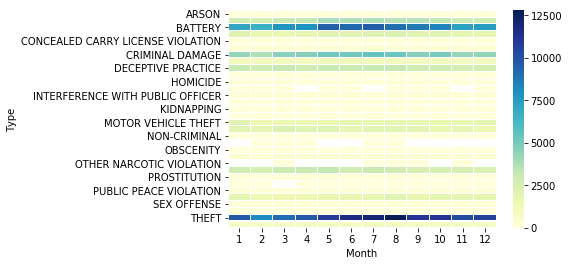

In [36]:
heatmap_data = full_data.groupby(['month', 'primary_type']).size().reset_index()
heatmap_data.rename(columns={0:'Count','primary_type':'Type','month':'Month'}, inplace=True)
heatmap_data = heatmap_data.reset_index()
heatmap_pivot = heatmap_data.pivot(index='Type', columns='Month', values='Count')
seasonal = sns.heatmap(heatmap_pivot, cmap="YlGnBu", linewidths=0.05)

#### Part 3
1. Examine the underlying causes of crime in highly impacted wards where crimes occur more frequently (especially Wards 42, 24, 28 and 27). Explore potential amelioration strategies like increased investment in mental health resources.
2. Promote solutions like upgraded building alarms and more robust neighborhood watch organizations in wards that experienced particularly high rates of Theft (for example, Ward 2).
3. Target resources for community economic development toward zip codes with lower median household incomes, as lower incomes appear to be associated with higher crime rates and especially violent crimes like homicide.
4. Think about differential crime deterrents in public places across wards where crimes most commonly occur on the street (e.g. Wards 4, 11, 39, etc.) versus wards where crimes most commonly occur in residences (e.g. Wards 9, 23, 41, etc.). Look into crimes reported in Ward 42 to determine whether the large number of crimes reported in Restaurants is truly a policy issue of some kind or is some kind of quirk or error in the data.
5. From the heatmap above, consider the differences between seasons that might cause spikes in crime during the summer month. Devote more resources to crisis intervention, neighborhood watch, and other community policing solutions during these high-risk months.

#### Part 4
These analyses and recommendations are based exclusively on summary and descriptive statistics, so they only capture correlations between different variables and basic trends over time. They do not purport to explain the causes of various phenomena described, and therefore recommendations are more general and less tailored than if a more robust statistical method than simple correlation and description were used to generate results.

### Question 4
#### Part A
First, identify blocks on S Michigan Ave. From the exploration detailed below, there do not appear to be any observations from the 020XX S Michigan Ave block.

In [37]:
michigan = full_data[full_data['block'].str.contains('S Michigan')]

In [38]:
print(michigan['block'])

15139     010XX S Michigan Ave
156398    121XX S Michigan Ave
170006    0000X S Michigan Ave
175532    018XX S Michigan Ave
183515    002XX S Michigan ave
206783    002XX S Michigan Ave
262876    023XX S Michigan Ave
296902    002XX S Michigan Ave
323133    0000X S Michigan Ave
344405    014XX S Michigan Ave
388309    039XX S Michigan Ave
471503    014XX S Michigan Ave
505910    0000X S Michigan Ave
527601    018XX S Michigan Ave
Name: block, dtype: object


Geographically speaking, the closest block to 2111 S Michigan is 23XX S Michigan, so use statistics from that block to approximate. The following lines limit the dataset to observations from 23XX S Michigan, then calculate the percentage of reported crimes by type from that block over the 2017-2018 period (7,823 crimes total).

The most likely crime type on this block is THEFT (27.05% of all reports), followed by BATTERY (18.79%) and CRIMINAL DAMAGE (9.69%). A full list of crime types and probabilities is available below.

In [39]:
michigan_23xx = full_data[full_data['block']=="023XX S Michigan Ave"]['zipcode'].iloc[0]

In [40]:
local_zip_data = full_data[full_data['zipcode']==michigan_23xx]

In [41]:
local_zip_data.groupby(["primary_type"]).size().apply(lambda x: x/len(local_zip_data)).sort_values(ascending=False)

primary_type
THEFT                               0.270484
BATTERY                             0.187907
CRIMINAL DAMAGE                     0.096894
DECEPTIVE PRACTICE                  0.081938
ASSAULT                             0.078614
OTHER OFFENSE                       0.061869
ROBBERY                             0.050236
MOTOR VEHICLE THEFT                 0.040394
BURGLARY                            0.037070
CRIMINAL TRESPASS                   0.036175
NARCOTICS                           0.019558
WEAPONS VIOLATION                   0.009204
CRIM SEXUAL ASSAULT                 0.006775
SEX OFFENSE                         0.005624
OFFENSE INVOLVING CHILDREN          0.005241
PUBLIC PEACE VIOLATION              0.004857
INTERFERENCE WITH PUBLIC OFFICER    0.001406
INTIMIDATION                        0.001150
HOMICIDE                            0.001023
PROSTITUTION                        0.000767
STALKING                            0.000767
ARSON                               0.0006

#### Part B
To answer this question, calculate the total number of 'THEFT' calls, then look at the proportion that are in each neighborhood. We know prior that the call type is 'THEFT', our job is to determine the probability that the call comes from either neighborhood.

Community area number of West Garfield Park: 26
Community area number of East Garfield Park: 27
Community area number of Uptown: 3

First, filter the data on primary_type = "THEFT", then split out all observations by community area.

In [42]:
theft = full_data[full_data['primary_type']=='THEFT']
#uptown_garfield_theft = theft[theft['community_area'].isin(['3', '27'])]

In [43]:
theft_pr = theft.groupby(["community_area"]).size().apply(lambda x: x/len(theft)).sort_values(ascending=False)
print("Probability of theft call being from Uptown: ", "{:.2%}".format(theft_pr.loc['3']))
print("Probability of theft call being from West Garfield Park: ", "{:.2%}".format(theft_pr.loc['26']))
print("Probability of theft call being from East Garfield Park: ", "{:.2%}".format(theft_pr.loc['27']))

Probability of theft call being from Uptown:  1.50%
Probability of theft call being from West Garfield Park:  0.95%
Probability of theft call being from East Garfield Park:  0.99%


Of all theft calls, the probability that the call came from Uptown is 1.50% and the probability the call came from East Garfield Park is 0.99%, a difference of 0.51% (more likely to be from Uptown).

It's similar for West Garfield Park: the probability the theft call came from there is 0.95%, which is less likely than Uptown by 0.55% (still more likely to be from Uptown).

#### Part C
In this case, the salient piece of information is that there are 100 Battery calls from Garfield Park and 160 Battery calls from Uptown. Because we know the call that comes in is about Battery, we can limit our universe to those 260 Battery calls. Thus, the probabilities that the Battery calls originates from each neighborhood is as follows:

In [44]:
print("Probability the Battery call comes from Garfield Park is", "{:.2%}".format(100/260))
print("Probability the Battery call comes from Uptown is", "{:.2%}".format(160/260))

Probability the Battery call comes from Garfield Park is 38.46%
Probability the Battery call comes from Uptown is 61.54%


Therefore, it is about 23% more likely the call comes from Uptown than Garfield Park.